In [19]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [20]:
#Densité de médecins pour 100.000 habitants
tab_densite = pd.read_csv('Densite_Specialiste_Medecins.csv',encoding='cp1252',header = 0)
tab_densite.rename(columns={'SPECIALITE': 'Departement'}, inplace=True)
tab_densite.rename(columns={"Ensemble des spécialités d'exercice": "ToutMedecins"}, inplace=True)
tab_densite

,Departement,ToutMedecins,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
0,FRANCE ENTIERE,337.9,184.8,2.5,17.2,4.5,10.7,5.3,1.7,5.1,...,4.6,23.0,13.3,1.4,0.7,0.0,3.9,2.5,153.0,153.0
1,FRANCE Métropolitaine,340.1,186.6,2.5,17.3,4.5,10.8,5.4,1.7,5.1,...,4.7,23.3,13.4,1.4,0.7,0.0,4.0,2.5,153.5,153.5
2,DROM,270.4,130.8,1.2,14.7,3.5,7.0,3.2,0.8,3.3,...,2.7,13.1,8.5,0.8,0.5,0.0,1.6,2.9,139.6,139.6
3,Auvergne-Rhône-Alpes,339.5,182.5,2.6,18.8,3.9,9.7,5.4,1.7,5.5,...,4.5,22.8,13.1,1.4,0.5,0.0,4.2,2.6,157.0,157.0
4,Bourgogne-Franche-Comté,297.2,153.1,1.7,14.1,3.9,8.4,4.4,1.2,4.9,...,4.3,18.2,11.0,1.3,0.7,0.0,2.8,2.4,144.1,144.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,971 - Guadeloupe,289.1,142.5,2.0,12.7,5.1,7.6,3.3,0.5,4.1,...,2.0,12.7,8.6,0.8,0.8,0.0,2.0,2.8,146.6,146.6
113,972 - Martinique,291.1,150.2,1.6,17.1,2.7,7.7,5.6,0.8,5.6,...,3.2,16.0,8.5,1.3,0.3,0.0,3.2,3.7,140.9,140.9
114,973 - Guyane,217.8,87.2,0.4,9.1,4.0,2.6,2.9,0.0,1.8,...,1.5,6.2,5.1,0.0,0.7,0.0,0.4,4.4,130.6,130.6
115,974 - La Réunion,324.8,159.6,1.2,19.6,3.8,9.5,2.7,1.4,3.3,...,3.8,16.7,11.4,1.0,0.5,0.0,1.6,2.9,165.2,165.2


In [21]:
tab_densite.columns

Index(['Departement', 'ToutMedecins', 'Spécialistes',
       'Anatomie et cytologie pathologiques', 'Anesthésie-réanimation',
       'Biologie médicale', 'Cardiologie et maladies vasculaires',
       'Chirurgie générale', 'Chirurgie maxillo-faciale et stomatologie',
       'Chirurgie orthopédique et traumatologie', 'Chirurgie infantile',
       'Chirurgie plastique reconstructrice et esthétique',
       'Chirurgie thoracique et cardio-vasculaire', 'Chirurgie urologique',
       'Chirurgie vasculaire', 'Chirurgie viscérale et digestive',
       'Dermatologie et vénéréologie', 'Endocrinologie et métabolisme',
       'Génétique médicale', 'Gériatrie', 'Gynécologie médicale',
       'Gynécologie-obstétrique', 'Hématologie',
       'Gastro-entérologie et hépatologie', 'Médecine du travail',
       'Médecine interne', 'Médecine nucléaire',
       'Médecine physique et réadaptation', 'Néphrologie', 'Neurochirurgie',
       'Neurologie', 'ORL et chirurgie cervico-faciale',
       'Oncologie op

In [22]:
#Remboursements par la sécurité sociale
dfa = pd.read_excel('Honoraires_totaux_par_departement_en_2017.xls','Spécialistes')
dfb = pd.read_excel('Honoraires_totaux_par_departement_en_2017.xls','Généralistes et MEP')

In [23]:
## Onglet Spécialistes
dfa.rename(columns={'TOTAL DES HONORAIRES (Euros)': 'Total'}, inplace=True)
dfa = dfa[dfa.Total !='nc']
dfa.columns

Index(['Spécialistes', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'Total'],
      dtype='object')

In [24]:
## Onglet Medecins Généralistes
dfb.rename(columns={'Généralistes et compétences MEP': 'Spécialistes'}, inplace=True)
dfb.rename(columns={'TOTAL DES HONORAIRES (Euros)': 'Total'}, inplace=True)
dfb = dfb[dfb.Total !='nc']
dfb.columns

Index(['Spécialistes', 'DEPARTEMENT', 'EFFECTIFS',
       'HONORAIRES SANS DEPASSEMENT (Euros)', 'DEPASSEMENTS (Euros)',
       'FRAIS DE DEPLACEMENT (Euros)', 'Total'],
      dtype='object')

In [25]:
## On concatène Spécialistes et Généralistes, ce qui nous intéresse
## ce sont tous les dépassements d'honoraires
df_final = pd.concat([dfa, dfb], axis=0, sort=False)

In [26]:
## Changement du type de certaines colonnes d'object à float pour pouvoir faire des calculs
df_final = df_final.astype({'HONORAIRES SANS DEPASSEMENT (Euros)': numpy.float64, 
                            'DEPASSEMENTS (Euros)': numpy.float64,
                           'FRAIS DE DEPLACEMENT (Euros)': numpy.float64,
                           'Total': numpy.float64})
print(df_final.dtypes)

Spécialistes                            object
DEPARTEMENT                             object
EFFECTIFS                                int64
HONORAIRES SANS DEPASSEMENT (Euros)    float64
DEPASSEMENTS (Euros)                   float64
FRAIS DE DEPLACEMENT (Euros)           float64
Total                                  float64
dtype: object


In [27]:
## On enlève de la table les lignes où il n'y a pas ce type de médecins dans le département
df_final = df_final[df_final['EFFECTIFS'] != 0]

## On calcule le coût pour la sécurité sociale d'un médecin
df_final['dep_unit']=df_final['DEPASSEMENTS (Euros)']/df_final['EFFECTIFS']

In [28]:
df_final

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),Total,dep_unit
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4675795.92,2548194.45,0.00,7223990.37,149893.791176
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,18,5196860.22,388808.16,0.00,5585668.38,21600.453333
2,02- Anesthésie-réanimation chirurgicale,03- Allier,17,4738207.65,530489.48,0.00,5268697.13,31205.263529
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,108,25614553.58,11165710.59,0.00,36780264.17,103386.209167
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,21,5613968.70,798986.69,0.00,6412955.39,38046.985238
...,...,...,...,...,...,...,...,...
6951,93- SOS Médecins,87- Haute-Vienne,15,2982461.22,1919.37,1887.75,2986268.34,127.958000
6955,93- SOS Médecins,91- Essonne,16,3395502.40,158612.82,609.00,3554724.22,9913.301250
6959,93- SOS Médecins,95- Val-d'Oise,26,4140058.69,74656.59,2198.00,4216913.28,2871.407308
6960,93- SOS Médecins,TOTAL FRANCE METROPOLITAINE,331,62303424.99,607892.13,951396.55,63862713.67,1836.532115


In [29]:
## définition des fonctions filtre personnalisés
## Afin de join les deux tables, nous allons y mettre dans les deux le numéro du département

def num_departement(row):
    if row[0][0:2] == '97':
        return row[0][0:3]
    elif row[0][0:1] == '0':
        return row[0][1:2]
    else:
        return row[0][0:2]
    
def my_filter(row):
    if ' - ' in row[0]:
        return True
    else:
        return False    
    

def my_filter2(row):
    if '- ' in row[0]:
        return True
    else:
        return False
    
def my_filter2(row):
    if '- ' in row[0]:
        return True
    else:
        return False    
    

In [30]:
df_final = df_final[['DEPARTEMENT','dep_unit']]

df_final = df_final[df_final.apply(my_filter2, axis=1)] 
df_final['Num_Depart'] = df_final.apply(num_departement, axis=1)
df_final['One'] = 1

df_final

## On groupe tous les types de médecins de chaque département
df_final2 = df_final.groupby(['Num_Depart']).sum()
df_final2['dep_unit'] = df_final2['dep_unit']/df_final2['One']
df_final2.drop(['One'], axis='columns', inplace=True)

df_final2

,dep_unit
Num_Depart,
1,51374.435273
10,31407.913015
11,10371.806450
12,3306.934192
13,28935.878167
...,...
971,12673.059057
972,34164.825907
973,4932.226700


In [31]:
tab_densite2 = tab_densite.loc[:,['Departement', 'ToutMedecins']]
tab_densite2 = tab_densite2[tab_densite2.apply(my_filter, axis=1)]

In [32]:
tab_densite2['Num_Depart'] = tab_densite2.apply(num_departement, axis=1)
tab_densite2=tab_densite2[['Num_Depart','ToutMedecins']]

In [33]:
tab_densite2

,Num_Depart,ToutMedecins
16,1,185.7
17,2,230.3
18,3,285.1
19,4,304.1
20,5,440.6
...,...,...
112,971,289.1
113,972,291.1
114,973,217.8
115,974,324.8


In [34]:
# Join des informations des deux tables
df_join = df_final2.join(tab_densite2.set_index('Num_Depart'))
df_join = df_join.sort_values(by = 'ToutMedecins')
df_join

,dep_unit,ToutMedecins
Num_Depart,,
976,629.256237,79.9
27,37976.952715,166.7
1,51374.435273,185.7
53,8794.999930,199.7
18,18981.248343,211.6
...,...,...
5,7741.605786,440.6
13,28935.878167,444.0
69,82385.483247,447.6


Text(0, 0.5, 'Coûts / Médecin')

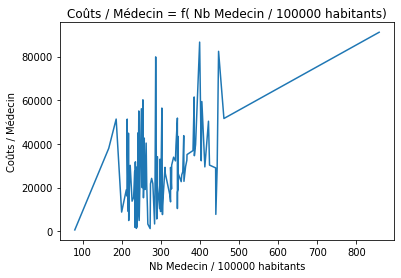

In [35]:
# tracé de la courbe de cout pour la sécurité sociale / médecin = f(nb de médicins / 100000 habitants)
plt.plot(df_join['ToutMedecins'],df_join['dep_unit'])
plt.title("Coûts / Médecin = f( Nb Medecin / 100000 habitants)")
plt.xlabel('Nb Medecin / 100000 habitants')
plt.ylabel('Coûts / Médecin')

On peut voir que si on ne tient compte que des points extrêmes:
- Mayotte: la plus petite densité de médecins et le moins de dépassement d'honoaires
- Paris: la plus grande densité de médecins et le plus de dépassement d'honoraires

C'est exactement le contraire de ce que l'on pensait trouver au départ, c'est à dire que plus la densité est forte, moins il y a de dépassement d'honoraires.

Au vu de la courbe, les données des autres départements montrent clairement une décorrélation entre densité et dépassement d'honoraires.

D'autres facteurs doivent être pris en compte, comme par exemple le coût de la vie, le pouvoir d'achat dans le département, les spécialisations les plus rémunératrices sont-elles présentes uniquement dans certaines régions ...

In [36]:
# ANNEXE
# numéro des départements français
# Pas utilisé

dep_france = pd.read_excel('departements-francais.xls')
dep_france.drop([101,102], inplace=True)
dep_france = dep_france[['NUMÉRO', 'NOM']]
dep_france

,NUMÉRO,NOM
0,1,Ain
1,2,Aisne
2,3,Allier
3,4,Alpes-de-Haute-Provence
4,5,Hautes-Alpes
...,...,...
96,971,Guadeloupe
97,972,Martinique
98,973,Guyane
99,974,La Réunion
